## Implementación de Random Forest con el uso de un framework o librería

En este proyecto, se planea construir un sistema de recomendación de películas personalizado utilizando un modelo predictivo basada en el conjunto de datos MovieLens.

El objetivo principal de este proyecto es explorar cómo implementar un modelo predictivo para proporcionar a los usuarios recomendaciones de películas altamente personalizadas.

---

**¿Qué película deberías ver a continuación?**

---

El conjunto de datos MovieLens nos proporciona una amplia gama de información sobre las calificaciones de los usuarios para diferentes películas. Esta información nos permitirá entrenar un modelo predictivo que pueda predecir las preferencias de los usuarios y ofrecer recomendaciones de películas que se adapten a sus gustos individuales.

*Los datos utilizados en este proyecto provienen de MovieLens: https://grouplens.org/datasets/movielens/100k/, una comunidad en línea que reúne calificaciones y revisiones de películas de usuarios de todo el mundo.


### 1. Importar librerías

In [215]:
# Importamos librerias
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2


from tensorflow import keras
from tensorflow.keras.models import Sequential

from keras.initializers import he_normal

import warnings

# Para desactivar todos los warnings
warnings.filterwarnings('ignore')

In [2]:
# Introducción al proyecto
resumen = """
Proyecto de Recomendación de Películas
    
Este proyecto utiliza el conjunto de datos MovieLens para implementar un sistema de recomendación de películas.
El objetivo es proporcionar recomendaciones personalizadas a los usuarios ya existentes basadas en sus preferencias, 
características personales y patrones de calificación. \n
"""
print(resumen)
print("-----------* Librerias importadas con éxito \n")


Proyecto de Recomendación de Películas
    
Este proyecto utiliza el conjunto de datos MovieLens para implementar un sistema de recomendación de películas.
El objetivo es proporcionar recomendaciones personalizadas a los usuarios ya existentes basadas en sus preferencias, 
características personales y patrones de calificación. 


-----------* Librerias importadas con éxito 



### 2. Definir funciones

In [23]:

       
    # Función para obtener el nombre del género para un 'movie_id'
def obtener_genre_name(movie_id):
              # Buscamos el movie_id en el dataset data_item y seleccionamos las columnas binarias de cada genre_id
    genres = data_item[data_item['movie_id'] == movie_id].iloc[:, 5:] 
              # Buscamos la columna que tiene el valor máximo (1) y accedemos al nombre de la columna (genre_id)
    genre_id = genres.idxmax(axis=1).values[0]
              # Con el genre_id y el diccionario, obtenemos el genre_name de el movie_id correspondiente
    return genre_mapping[int(genre_id.split('_')[1])]

        # Función para definir estructura del modelo de red neuronal
def set_nn_model_architecture():
        # Define Model
    model = Sequential(name='my_sequential_model')

        # Hidden Layer 1: Fully-connected layer con 64 unidades y función de activación ReLU
    model.add(Dense(units=16, input_shape=X_train_encoded.shape[1:], activation='relu',
                    kernel_initializer=he_normal(),
                    name='hiddenlayer1'))
    
        # Capa de salida
    model.add(Dense(units=1, activation='linear', name='outputlayer'))

    model.summary()

    return model

        # Función para definir estructura del modelo de red neuronal mejorado
def set_nn_model_architecture_better():
    # Define Model
    model = Sequential(name='my_sequential_model')

    # Hidden Layer 1: Fully-connected layer con 64 unidades y función de activación ReLU
    model.add(Dense(units=16, input_shape=X_train_encoded.shape[1:], activation='relu',
                    kernel_initializer=he_normal(),
                    name='hiddenlayer1'))
    
    model.add(Dropout(rate=0.3))  # Dropout para regularización

    # Capas ocultas adicionales con regularización L2 y BatchNormalization
    model.add(Dense(units=32, activation='relu', name='hiddenlayer2', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=32, activation='relu', name='hiddenlayer3', kernel_regularizer=l2(0.001)))
   
   # Agrega Batch Normalization después de la capa oculta
    model.add(BatchNormalization(name='batch_normalization1'))

    model.add(Dense(units=64, activation='relu', name='hiddenlayer4', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=64, activation='relu', name='hiddenlayer5', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=128, activation='relu', name='hiddenlayer6', kernel_regularizer=l2(0.001)))
    model.add(Dense(units=128, activation='relu', name='hiddenlayer7', kernel_regularizer=l2(0.001)))

    # Capa de salida
    model.add(Dense(units=1, activation='linear', name='outputlayer'))


    model.summary()
    
    return model 

        #Función para predecir y evaluar modelos multiclase
def evaluar_modelo(modelo, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calcular la Raíz del Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mse)

    # Calcular el Coeficiente de Determinación (R2)
    r2 = r2_score(y_test, y_pred)
    
    print("Error Cuadrático Medio (MSE):", mse)
    print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
    print("Coeficiente de Determinación (R2):", r2)

        # Función para trazar las curvas de aprendizaje
def plot_acc_loss(training_history):
    plt.plot(training_history.history['loss'])
    plt.plot(training_history.history['val_loss'])
    plt.title('Loss vs. Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

print("-----------* Funciones definidas con éxito \n")

IndentationError: expected an indented block after function definition on line 2 (1693986877.py, line 4)

### 3. Importar datos

In [4]:
# Cargamos los datasets (la carpeta MovieLens debe estar en la misma carpeta que el programa)
    # Leer el archivo u_data en un DataFrame
data_general = pd.read_csv('MovieLens/u_data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

    # Leer el archivo u_genre en un DataFrame
data_genre = pd.read_csv('MovieLens/u_genre', sep='|', names=['genre_name', 'genre_id'])

    # Leer el archivo u_item en un DataFrame
        # Lista de nombres de columnas para el DataFrame
columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
data_item = pd.read_csv('MovieLens/u_item', sep='|', names=columns, encoding='latin-1')   

    # Lee el archivo 'u_user' usando '|'
data_user = pd.read_csv('MovieLens/u_user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code']) 

    # Lee el archivo u_info y almacena la información en variables individuales
with open('MovieLens/u_info', 'r') as file:
    lines = file.readlines()
    users_count = int(lines[0].split()[0])
    items_count = int(lines[1].split()[0])
    ratings_count = int(lines[2].split()[0])

print("-----------* Datos importados con éxito \n")

# Muestra la información de u_info
print("Para realizar el proyecto, se tienen los siguientes datos.")
print("- Cantidad de usuarios:", users_count)
print("- Cantidad de películas:", items_count)
print("- Cantidad de calificaciones:", ratings_count)

-----------* Datos importados con éxito 

Para realizar el proyecto, se tienen los siguientes datos.
- Cantidad de usuarios: 943
- Cantidad de películas: 1682
- Cantidad de calificaciones: 100000


### 4. Combinar datos

In [5]:
print("-----------* Combinando datos... \n")

# Fusionar los DataFrames
merged_data = pd.merge(data_general, data_user, on='user_id') # Combinamos las calificaciones con las características del usuario

# Añadimos el género de las peliculas segun su id
       # Crear un diccionario que mapee 'genre_id' a 'genre_name'
genre_mapping = dict(data_genre[['genre_id', 'genre_name']].values)

# Aplicar la función obtener_genre_name para crear la columna 'genre_name'
merged_data['genre_name'] = merged_data['movie_id'].apply(obtener_genre_name)

# Seleccionar las columnas de interés
final_data = merged_data[['user_id', 'movie_id', 'age', 'gender', 'genre_name', 'rating']] # Quitamos la columna timestamp, zip_code y genre_id

# Mostrar el DataFrame resultante
print("-----------* Datos combinados con éxito \n")

print(final_data)
print("\n Estos son los datos que utilizaremos para entrenar nuestros modelos. \n")

-----------* Combinando datos... 

-----------* Datos combinados con éxito 

       user_id  movie_id  age gender genre_name  rating
0          196       242   49      M     Comedy       3
1          196       393   49      M     Comedy       4
2          196       381   49      M     Comedy       4
3          196       251   49      M     Comedy       3
4          196       655   49      M  Adventure       5
...        ...       ...  ...    ...        ...     ...
99995      941       919   20      M  Adventure       5
99996      941       273   20      M     Action       3
99997      941         1   20      M  Animation       5
99998      941       294   20      M     Comedy       4
99999      941      1007   20      M     Comedy       4

[100000 rows x 6 columns]

 Estos son los datos que utilizaremos para entrenar nuestros modelos. 



### 5. Dividir datos (Entrenamiento y prueba)


In [6]:
# Definir X y y
X = final_data[['user_id', 'movie_id', 'age', 'gender', 'genre_name']]
y = final_data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

# Ajustar los datos a los modelos que no manejan cualitativas originales
X_encoded = pd.get_dummies(X, columns=['gender', 'genre_name'], drop_first=True)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size = 0.2, random_state=44)

print("-----------* Datos divididos para entrenamiento y prueba con éxito \n")

-----------* Datos divididos para entrenamiento y prueba con éxito 



### 4. Entrenar modelos

#### *Árbol de decisión*

In [7]:
# Crear el modelo de Árbol de Decisión
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    # profundidad máxima de 5 para el árbol de decisión con el propósito de acelerar el tiempo de entrenamiento y prevenir el sobreajuste

print("-----------* Creación del primer modelo con éxito \n")

# Entrenar el modelo en los datos de entrenamiento
decision_tree_model.fit(X_train_encoded, y_train_encoded)

print("-----------* Primer modelo entrenado con éxito \n")

# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del primer modelo: Árbol de decisión \n")
evaluar_modelo(decision_tree_model, X_test_encoded, y_test_encoded)

# Despliegue de conclusión
print(""" 
      
Continuaremos explorando otros modelos...""")

-----------* Creación del primer modelo con éxito 

-----------* Primer modelo entrenado con éxito 

Evaluación del primer modelo: Árbol de decisión 

Error Cuadrático Medio (MSE): 1.159606552218771
Raíz del Error Cuadrático Medio (RMSE): 1.0768502923892305
Coeficiente de Determinación (R2): 0.07900849501151119
 
      
Continuaremos explorando otros modelos...


#### *Random Forest*

In [11]:
# Crear el modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=300, random_state=42)
print("-----------* Creación del segundo modelo con éxito \n")

# Entrenar el modelo en los datos de entrenamiento
random_forest_model.fit(X_train_encoded, y_train_encoded)

print("-----------* Segundo modelo entrenado con éxito \n")

# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del segundo modelo: Random Forest \n")
evaluar_modelo(random_forest_model, X_test_encoded, y_test_encoded)

# Despliegue de conclusión
print(""" 
      
Continuaremos explorando otros modelos...""")


-----------* Creación del segundo modelo con éxito 

-----------* Segundo modelo entrenado con éxito 

Evaluación del segundo modelo: Random Forest 

Error Cuadrático Medio (MSE): 1.0617706355555554
Raíz del Error Cuadrático Medio (RMSE): 1.0304225519443737
Coeficiente de Determinación (R2): 0.15671247827822876
 
      
Continuaremos explorando otros modelos...


#### *Red Neuronal*

In [69]:
# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Ajusta (calcula la media y la desviación estándar) y transforma X_train_encoded
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Solo transforma X_test_encoded usando los parámetros aprendidos en X_train_encoded
X_test_scaled = scaler.transform(X_test_encoded)

In [70]:
# Establece la semilla aleatoria en NumPy para la aleatoriedad controlada
np.random.seed(0)

# Crea tu modelo
model_nn = set_nn_model_architecture()

print("-----------* Creación del tercer modelo con éxito \n")

# Define el optimizador
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compila el modelo
model_nn.compile(optimizer=adam, loss='mean_squared_error')

# Entrena el modelo
training_history = model_nn.fit(X_train_scaled, y_train_encoded, epochs=100, validation_split=0.15)

print("-----------* Tercer modelo entrenado con éxito \n")

Model: "my_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 16)                368       
                                                                 
 outputlayer (Dense)         (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


-----------* Creación del tercer modelo con éxito 

Epoch 1/100
2125/2125 [==============================] - 1s 301us/step - loss: 1.9107 - val_loss: 1.2164
Epoch 2/100
2125/2125 [==============================] - 1s 302us/step - loss: 1.2183 - val_loss: 1.2085
Epoch 3/100
2125/2125 [==============================] - 1s 284us/step - loss: 1.2049 - val_loss: 1.2101
Epoch 4/100
2125/2125 [==============================] - 1s 283us/step - loss: 1.1979 - val_loss: 1.2021
Epoch 5/100
2125/2125 [==============================] - 1s 287us/step - loss: 1.1967 - val_loss: 1.2087
Epoch 6/100
2125/2125 [==============================] - 1s 292us/step - loss: 1.1946 - val_loss: 1.2013
Epoch 7/100
2125/2125 [==============================] - 1s 291us/step - loss: 1.1934 - val_loss: 1.2013
Epoch 8/100
2125/2125 [==============================] - 1s 278us/step - loss: 1.1927 - val_loss: 1.1996
Epoch 9/100
2125/2125 [==============================] - 1s 278us/step - loss: 1.1923 - val_loss: 1.2043
Epo

In [71]:
# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del cuarto modelo: Red Neuronal \n")
evaluar_modelo(model_nn, X_test_scaled, y_test_encoded)

Evaluación del cuarto modelo: Red Neuronal 

625/625 [==============================] - 0s 182us/step
Error Cuadrático Medio (MSE): 1.1790244052980738
Raíz del Error Cuadrático Medio (RMSE): 1.0858289024050123
Coeficiente de Determinación (R2): 0.06358630056380477


### 5. Seleccionar modelo


In [49]:
print("""
Observando las evaluaciones de cada modelo, se selecciona el modelo de...

RED NEURONAL
      
La decisión fue tomado por su capacidad de abordar la complejidad de los datos y el potencial que se le 
ve al modelo para mejorar mediante validación cruzada. Además se toma en cuenta que con 100,000 registros es suficiente
para entrenar una Red Neuronal.
""")
      
print("-----------* Modelo seleccionado con éxito \n")


Observando las evaluaciones de cada modelo, se selecciona el modelo de...

RED NEURONAL
      
La decisión fue tomado por su capacidad de abordar la complejidad de los datos y el potencial que se le 
ve al modelo para mejorar mediante validación cruzada. Además se toma en cuenta que con 100,000 registros es suficiente
para entrenar una Red Neuronal.

-----------* Modelo seleccionado con éxito 



### 6. Análisis del modelo

In [50]:
print("""
Realizaremos un análisis profundo de nuestro modelo de Red Neuronal original. 
Posterior a esto, se mejorará el modelo y se volverá a analizar.
""")


Realizaremos un análisis profundo de nuestro modelo de Red Neuronal original. 
Posterior a esto, se mejorará el modelo y se volverá a analizar.




 Análisis del modelo: Red Neuronal Original 



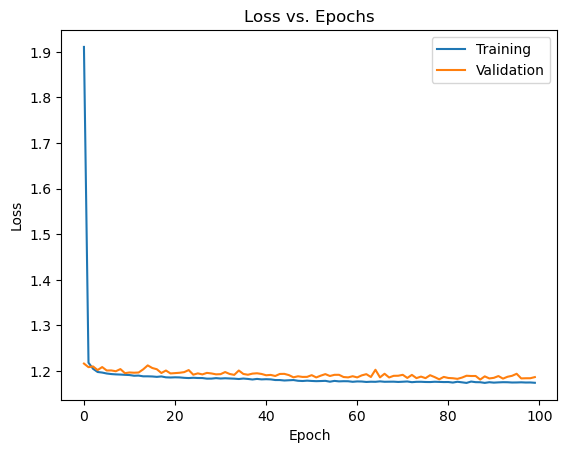

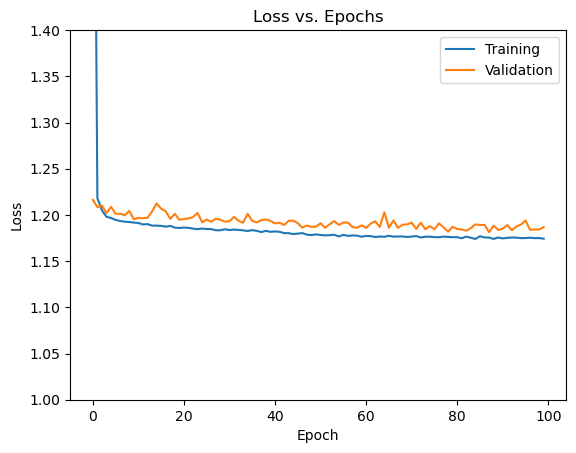

                   Loss
Entrenamiento  1.174328
Validación     1.182657


In [75]:
print("\n Análisis del modelo: Red Neuronal Original \n")
#plt.ylim(1.1, 7)
plot_acc_loss(training_history) # Observamos su exactitud y pérdida a lo largo de las epochs

plt.ylim(1, 1.4)
plot_acc_loss(training_history) # hacemos zoom


# Crear un nuevo DataFrame con las métricas finales
df_last_metrics = pd.DataFrame({
    'Loss': [training_history.history['loss'][-1], training_history.history['val_loss'][-1]]
}, index=['Entrenamiento', 'Validación'])

print(df_last_metrics)

In [105]:
print("""
Nos damos cuenta que el modelo presenta un comportamiento de underfitting. 

Ambas pérdidas disminuyen a lo largo de las epochs, esto nos da una señal positiva acerca del comportamiento del modelo. Además, la diferencia entre 
las pérdidas de entrenamiento y validación es pequeña, lo que indica que el modelo generaliza bastante bien y no está sobreajustando en gran medida 
a los datos de entrenamiento. Sin embargo, también observamos una pérdida de valor significativo y esto representa un sesgo alto y bajo ajuste de modelo. 
Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos y es posible que el modelo 
necesite una mayor capacidad o una arquitectura más compleja para mejorar su rendimiento.
""")
      
# Despliegue de conclusión
print(""" 
      
Continuaremos a mejorar el modelo...""")


Nos damos cuenta que el modelo presenta un comportamiento de underfitting. 

Ambas pérdidas disminuyen a lo largo de las epochs, esto nos da una señal positiva acerca del comportamiento del modelo. Además, la diferencia entre 
las pérdidas de entrenamiento y validación es pequeña, lo que indica que el modelo generaliza bastante bien y no está sobreajustando en gran medida 
a los datos de entrenamiento. Sin embargo, también observamos una pérdida de valor significativo y esto representa un sesgo alto y bajo ajuste de modelo. 
Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos y es posible que el modelo 
necesite una mayor capacidad o una arquitectura más compleja para mejorar su rendimiento.

 
      
Continuaremos a mejorar el modelo...


### 6. Mejorar modelo

In [106]:
print("""
Para mejorar el modelo, aplicaremos dropout y batch normalization. Además añadiremos capas ocultas para agregar 
complejidad a la estructura de nuestra red neuronal
""")


Para mejorar el modelo, aplicaremos cross validation (k-folds), dropout y batch normalization. Además añadiremos capas ocultas para agregar 
complejidad a la estructura de nuestra red neuronal



In [78]:
# Creamos callback Ealry stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 40, mode =  "min")

# Crea y compila el modelo mejorado
model_better = set_nn_model_architecture_better()

print("-----------* Creación del modelo mejorado con éxito \n")

# Define el optimizador
adam2 = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compila el modelo
model_better.compile(optimizer=adam2, loss='mean_squared_error')

# Entrena el modelo con tus datos
training_history_better = model_better.fit(X_train_scaled, y_train_encoded, epochs=600, validation_split=0.15, callbacks=[early_stopping])

print("-----------* Modelo mejorado entrenado con éxito \n")

Model: "my_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 16)                368       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 hiddenlayer2 (Dense)        (None, 32)                544       
                                                                 
 hiddenlayer3 (Dense)        (None, 32)                1056      
                                                                 
 batch_normalization1 (Batch  (None, 32)               128       
 Normalization)                                                  
                                                                 
 hiddenlayer4 (Dense)        (None, 64)                2112      
                                               

In [96]:
# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del modelo: Red Neuronal Mejorado \n")
evaluar_modelo(model_better, X_test_scaled, y_test_encoded)

Evaluación del modelo: Red Neuronal Mejorado 

  1/625 [..............................] - ETA: 6s

625/625 [==============================] - 0s 264us/step
Error Cuadrático Medio (MSE): 1.1628009420225314
Raíz del Error Cuadrático Medio (RMSE): 1.0783324821327285
Coeficiente de Determinación (R2): 0.07647142253011163


Evaluación del cuarto modelo: Red Neuronal 

625/625 [==============================] - 0s 182us/step
Error Cuadrático Medio (MSE): 1.1790244052980738
Raíz del Error Cuadrático Medio (RMSE): 1.0858289024050123
Coeficiente de Determinación (R2): 0.06358630056380477


 Análisis del modelo: Red Neuronal Mejorado 



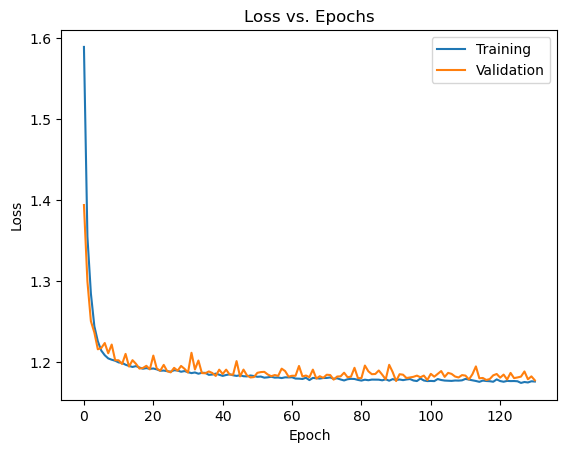

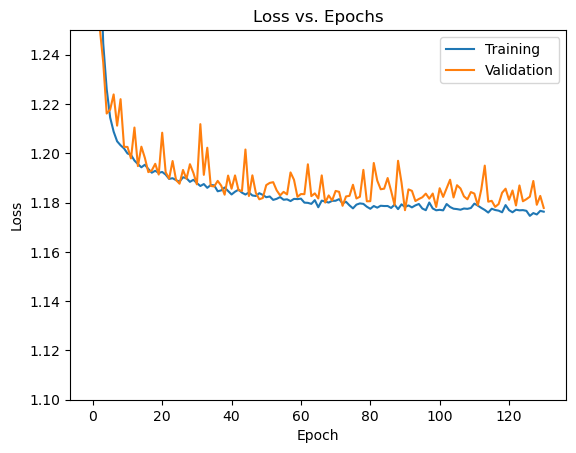

                   Loss
Entrenamiento  1.176318
Validación     1.177830


In [100]:
print("\n Análisis del modelo: Red Neuronal Mejorado \n")
#plt.ylim(1, 2)
plot_acc_loss(training_history_better) # Observamos su exactitud y pérdida a lo largo de las epochs

plt.ylim(1.1, 1.25)
plot_acc_loss(training_history_better) # hacemos zoom

# Crear un nuevo DataFrame con las métricas finales
df_last_metrics = pd.DataFrame({
    'Loss': [training_history_better.history['loss'][-1], training_history_better.history['val_loss'][-1]]
    
}, index=['Entrenamiento', 'Validación'])

print(df_last_metrics)

In [102]:
print("""
Tomando en consideración las métricas y gráficas de curva de aprendizaje del modelo, se concluye que el modelo tiene una mejora en su ajuste a los datos.
El grado de sesgo ha disminuido y la varianza es moderada pues el modelo no esta sobreajustado significativamente a los datos. Asimismo, el coeficiente
de determinación nos indica que el modelo si explica una parte de la variabilidad de los datos pero no es la mayoría. 

      
En resumen, el modelo de Red Neuronal Mejorado tiene un bajo sesgo, una varianza moderada y se ajusta aceptablemente bien a los datos de entrenamiento. 
Sin embargo, todavía hay margen de mejora para futuros proyectos. Por el momento, trabajaremos con el modelo mejorado para construir el sistema de recomendación.
""")

print("-----------* Modelo mejorado con éxito \n")  



Tomando en consideración las métricas y gráficas de curva de aprendizaje del modelo, se concluye que el modelo tiene una mejora en su ajuste a los datos.
El grado de sesgo ha disminuido y la varianza es moderada pues el modelo no esta sobreajustado significativamente a los datos. Asimismo, el coeficiente
de determinación nos indica que el modelo si explica una parte de la variabilidad de los datos pero no es la mayoría. 

      
En resumen, el modelo de Red Neuronal Mejorado tiene un bajo sesgo, una varianza moderada y se ajusta aceptablemente bien a los datos de entrenamiento. 
Sin embargo, todavía hay margen de mejora para futuros proyectos. Por el momento, trabajaremos con el modelo mejorado para construir el sistema de recomendación.

-----------* Modelo mejorado con éxito 



## 5. Construir sistema de recomendación


In [227]:
# Definir la función que nos ayuará a predecir en un futuro

    # Función que dado un usuario, entrega los id de las películas que no ha calificado
def obtener_peliculas_no_calificadas(usuario_especifico):
    # Filtrar las calificaciones del usuario específico en data_general
    calificaciones_usuario = data_general[data_general['user_id'] == usuario_especifico]

    # Obtener la lista de 'movie_id' de las películas calificadas por el usuario
    peliculas_calificadas_por_usuario = calificaciones_usuario['movie_id'].tolist()

    # Filtrar las películas en data_item para excluir las que el usuario ya calificó
    peliculas_no_calificadas = data_item[~data_item['movie_id'].isin(peliculas_calificadas_por_usuario)]

    # Agregar una columna 'user_id' con el valor proporcionado
    peliculas_no_calificadas['user_id'] = usuario_especifico

    return peliculas_no_calificadas

    # Función que fuciona y prepara los datos para poder predecir con ellos (todo en función al usuario otorgado)
def generar_X_para_predicciones(peliculas_no_calf):

    # Aplicar la función obtener_genre_name para crear la columna 'genre_name'
    peliculas_no_calf['genre_name'] = peliculas_no_calf['movie_id'].apply(obtener_genre_name)

    # Combinamos las calificaciones con las características del usuario
    peliculas_no_calf = pd.merge(peliculas_no_calf, data_user, on='user_id')

    # Pasar gender a 0 y 1 {'M': 1, 'F': 0}
    peliculas_no_calf['gender'] = peliculas_no_calf['gender'].replace({'M': 1, 'F': 0})
    peliculas_no_calf.rename(columns={'gender': 'gender_M'}, inplace=True)

    X_pred = peliculas_no_calf[['user_id', 'movie_id', 'age', 'gender_M', 'genre_name']]

    # Realizar one hot encoding
    X_pred_encoded = pd.get_dummies(X_pred, columns=['genre_name'], drop_first=True)

    return X_pred_encoded

def cinco_recomendaciones(X_pred_encoded):
    # Ajusta (calcula la media y la desviación estándar) y transforma X_pred_encoded
    X_pred_scaled = scaler.fit_transform(X_pred_encoded)

    # Realizar predicciones con el modelo
    predicciones = model_better.predict(X_pred_scaled)

    # Crear un DataFrame con las predicciones
    df_predicciones = pd.DataFrame(predicciones, columns=['Posible calificación'])

    # Unir las predicciones al DataFrame original (X_pred_encoded)
    X_pred_con_predicciones = pd.concat([X_pred_encoded['movie_id'], df_predicciones], axis=1)

    # Reordenar de mayor a menor para poder tomar las cinco peliculas con mejor calificación
    X_pred_con_predicciones = X_pred_con_predicciones.sort_values(by='Posible calificación', ascending=False).head(5)

    # Obtener titulos de las peliculas usando 'movie_id' como clave
    result = X_pred_con_predicciones.merge(data_item[['movie_id', 'movie_title']], on='movie_id', how='left')

    # Redondear calificación
    result['Posible calificación'] = result['Posible calificación'].astype(int)

    # Renombrar columna de movie_title
    result.rename(columns={'movie_title': 'Peliculas recomendadas'}, inplace=True)

    return result[['Peliculas recomendadas', 'Posible calificación']]

def sistema_de_recomendaciones(usuario_especifico):

    # Usamos las funciones que componen nuestro sistema de recomendación
    peliculas_no_calf = obtener_peliculas_no_calificadas(usuario_especifico)
    X_pred_encoded = generar_X_para_predicciones(peliculas_no_calf)
    recomendaciones = cinco_recomendaciones(X_pred_encoded)

    # Imprimir información sobre el usuario
        # Obtener información del usuario
    usuario_info = data_user[data_user['user_id'] == usuario_especifico]

    print("\nInformación del Usuario: ", usuario_especifico, "--------------------------")
    print("- Género:", usuario_info['gender'].values[0])
    print("- Edad:", usuario_info['age'].values[0])
    print("- Ocupación:", usuario_info['occupation'].values[0])

    # Imprimir recomendaciones de películas junto con un mensaje llamativo
    print("\n¡Estas son sus películas recomendadas!\n")
    print(recomendaciones) 
    

print("-----------* Nuevas funciones definidas con éxito \n")


-----------* Nuevas funciones definidas con éxito 



## 6. Predicciones


In [224]:
print("-----------* Preparando predicciones \n")

sistema_de_recomendaciones(179)
sistema_de_recomendaciones(3)
sistema_de_recomendaciones(280)
sistema_de_recomendaciones(61)
sistema_de_recomendaciones(925)

-----------* Preparando predicciones 

52/52 [==============================] - 0s 340us/step

Información del Usuario:  179 --------------------------
- Género: M
- Edad: 15
- Ocupación: entertainment

¡Estas son sus películas recomendadas!

           Peliculas recomendadas  Posible calificación
0  Hungarian Fairy Tale, A (1987)                     4
1             Blade Runner (1982)                     4
2                  Stalker (1979)                     4
3               Just Cause (1995)                     4
4                 Gaslight (1944)                     4
51/51 [==============================] - 0s 280us/step

Información del Usuario:  3 --------------------------
- Género: M
- Edad: 23
- Ocupación: writer

¡Estas son sus películas recomendadas!

           Peliculas recomendadas  Posible calificación
0                  Stalker (1979)                     4
1  Hungarian Fairy Tale, A (1987)                     4
2               Just Cause (1995)                     4
3 

In [225]:
print("-----------* Predicciones realizadas con éxito \n")

print("\n-----------* Programa ejecutado con éxito \n")

-----------* Predicciones realizadas con éxito 


-----------* Programa ejecutado con éxito 

